<a href="https://colab.research.google.com/github/NavyaPatil10/deep/blob/main/Copy_of_Deep_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
robikscube_textocr_text_extraction_from_images_dataset_path = kagglehub.dataset_download('robikscube/textocr-text-extraction-from-images-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Install necessary libraries
!pip install torch torchvision torchaudio -q
!pip install datasets transformers Pillow matplotlib numpy scikit-learn -q
!pip install Levenshtein # For Character Error Rate (CER)
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.models as models
from PIL import Image
import os
import pandas as pd
import numpy as np
import math
from tqdm.notebook import tqdm # Sử dụng tqdm.notebook nếu chạy trên Kaggle/Colab
import matplotlib.pyplot as plt
import json
from collections import Counter

In [ ]:
# --- Configuration ---
# Giả sử bạn đã có clean_ann và clean_img từ bước tiền xử lý
# dataset_path = "/kaggle/input/textocr-text-extraction-from-images-dataset"
# image_folder = os.path.join(dataset_path, "train_val_images/train_images/")
# ann_file = os.path.join(dataset_path, "annot.parquet") # Hoặc dùng clean_ann đã tạo
# img_file = os.path.join(dataset_path, "img.parquet")   # Hoặc dùng clean_img đã tạo

# !! QUAN TRỌNG: Cần đường dẫn chính xác tới file và thư mục ảnh !!
# Ví dụ (bạn cần thay đổi cho phù hợp):
dataset_path = "/kaggle/input/textocr-text-extraction-from-images-dataset"
image_folder = os.path.join(dataset_path, "train_val_images/train_images/")
ann_path = os.path.join(dataset_path, "annot.csv") # Sử dụng CSV cho dễ đọc
img_path = os.path.join(dataset_path, "img.csv")
Copy of Deep_Final
Copy of Deep_Final_

[ ]
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
robikscube_textocr_text_extraction_from_images_dataset_path = kagglehub.dataset_download('robikscube/textocr-text-extraction-from-images-dataset')

print('Data source import complete.')

Data source import complete.

[ ]
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[ ]
# Install necessary libraries
!pip install torch torchvision torchaudio -q
!pip install datasets transformers Pillow matplotlib numpy scikit-learn -q
!pip install Levenshtein # For Character Error Rate (CER)
!pip install jiwer
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.2 MB/s eta 0:00:00
Collecting Levenshtein
  Downloading levenshtein-0.27.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.6 kB)
Collecting rapidfuzz<4.0.0,>=3.9.0 (from Levenshtein)
  Downloading rapidfuzz-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Downloading levenshtein-0.27.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (161 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 7.2 MB/s eta 0:00:00
Downloading rapidfuzz-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.5 MB/s eta 0:00:00
Installing collected packages: rapidfuzz, Levenshtein
Successfully installed Levenshtein-0.27.1 rapidfuzz-3.13.0
Collecting jiwer
  Downloading jiwer-3.1.0-py3-none-any.whl.metadata (2.6 kB)
Requirement already satisfied: click>=8.1.8 in /usr/local/lib/python3.11/dist-packages (from jiwer) (8.1.8)
Requirement already satisfied: rapidfuzz>=3.9.7 in /usr/local/lib/python3.11/dist-packages (from jiwer) (3.13.0)
Downloading jiwer-3.1.0-py3-none-any.whl (22 kB)
Installing collected packages: jiwer
Successfully installed jiwer-3.1.0

[ ]
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision.models as models
from PIL import Image
import os
import pandas as pd
import numpy as np
import math
from tqdm.notebook import tqdm # Sử dụng tqdm.notebook nếu chạy trên Kaggle/Colab
import matplotlib.pyplot as plt
import json
from collections import Counter

[ ]


# --- Load and Prepare Data ---
try:
    df_ann = pd.read_csv(ann_path).dropna(subset=['utf8_string'])
    df_img = pd.read_csv(img_path)

    # Nhóm các annotation theo image_id và nối chuỗi
    # Sắp xếp theo 'id' của annotation để có thứ tự ổn định (dù có thể không hoàn hảo về mặt không gian)
    df_ann = df_ann.sort_values(by=['image_id', 'id'])
    image_to_text = df_ann.groupby('image_id')['utf8_string'].apply(lambda x: ' '.join(x)).reset_index()

    # Merge với thông tin ảnh để lấy file_name
    df_merged = pd.merge(image_to_text, df_img, left_on='image_id', right_on='id')
    print(f"Số lượng ảnh sau khi gộp text: {len(df_merged)}")
    print(df_merged.head())

except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file annotation hoặc image info tại đường dẫn cung cấp.")
    print("Vui lòng kiểm tra lại các biến 'ann_path', 'img_path' và 'image_folder'.")
    # Thoát nếu không có dữ liệu
    exit()
except Exception as e:
    print(f"Lỗi khi đọc hoặc xử lý dữ liệu: {e}")
    exit()


# --- Vocabulary Creation ---
all_texts = df_merged['utf8_string'].tolist()
char_counter = Counter()
for text in all_texts:
    char_counter.update(text)

# Giữ lại các ký tự phổ biến, ví dụ: xuất hiện ít nhất 5 lần
min_freq = 5
vocab = [char for char, count in char_counter.items() if count >= min_freq]

# Thêm các token đặc biệt
PAD_TOKEN = '<PAD>'
SOS_TOKEN = '<SOS>'
EOS_TOKEN = '<EOS>'
UNK_TOKEN = '<UNK>'
special_tokens = [PAD_TOKEN, SOS_TOKEN, EOS_TOKEN, UNK_TOKEN]
vocab = special_tokens + sorted(list(vocab)) # Sắp xếp để đảm bảo thứ tự nhất quán

char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = {idx: char for idx, char in enumerate(vocab)}
vocab_size = len(vocab)

PAD_IDX = char2idx[PAD_TOKEN]
SOS_IDX = char2idx[SOS_TOKEN]
EOS_IDX = char2idx[EOS_TOKEN]
UNK_IDX = char2idx[UNK_TOKEN]

print(f"Kích thước Vocabulary: {vocab_size}")
# print(f"Vocabulary: {''.join(vocab)}") # In ra để kiểm tra

Số lượng ảnh sau khi gộp text: 21778
           image_id                                        utf8_string  \
0  0000e8b36676338b                             FELIX PRIVAT DBU 889 .   
1  00010bf498b64bab  TEQU . . . . . . . . . . A . tel . . . . . . ....   
2  00016982f6086d39  3G UpCode Zip Tfl Tfl Map WinRaR Options Back ...   
3  0001c6bf48e16ab2        NISSAN GENISS . NISSAN LIVINA GENISS NISSAN   
4  000209d575f3aa4f  . . . . . . . . . . 6 BEER. . . . BEER MACAU M...   

   Unnamed: 0                id  width  height    set  \
0       15677  0000e8b36676338b   1024     685  train   
1       13865  00010bf498b64bab   1024     576  train   
2        7978  00016982f6086d39    576    1024  train   
3       10601  0001c6bf48e16ab2   1024     966  train   
4       12476  000209d575f3aa4f    682    1024  train   

                    file_name  
0  train/0000e8b36676338b.jpg  
1  train/00010bf498b64bab.jpg  
2  train/00016982f6086d39.jpg  
3  train/0001c6bf48e16ab2.jpg  
4  train/000209

In [ ]:
# --- Dataset Class ---
class TextOCRDataset(Dataset):
    def __init__(self, df, image_folder, char2idx, transform=None, max_seq_len=100):
        self.df = df
        self.image_folder = image_folder
        self.transform = transform
        self.char2idx = char2idx
        self.max_seq_len = max_seq_len # Giới hạn độ dài chuỗi

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        img_filename = row['file_name'].replace("train/", "") # Bỏ tiền tố 'train/' nếu có
        img_path = os.path.join(self.image_folder, img_filename)
        text = row['utf8_string']

        try:
            image = Image.open(img_path).convert("RGB")
            if self.transform:
                image = self.transform(image)
        except FileNotFoundError:
            print(f"Warning: Image not found at {img_path}. Skipping.")
            # Trả về None hoặc sample rỗng để DataLoader bỏ qua
            # Cách xử lý tốt hơn là lọc trước các ảnh bị thiếu
            # Tạm thời trả về sample đầu tiên để tránh lỗi
            return self.__getitem__(0)
        except Exception as e:
            print(f"Warning: Error loading image {img_path}: {e}. Skipping.")
            return self.__getitem__(0)


        # Tokenize text
        text_indices = [self.char2idx.get(char, UNK_IDX) for char in text]

        # Thêm SOS, EOS và Padding
        seq = [SOS_IDX] + text_indices[:self.max_seq_len-2] + [EOS_IDX]
        padding_len = self.max_seq_len - len(seq)
        padded_seq = seq + [PAD_IDX] * padding_len

        target_tensor = torch.tensor(padded_seq, dtype=torch.long)

        return image, target_tensor

# --- Transforms and DataLoader ---
# Kích thước ảnh cần phải nhất quán cho batching
IMG_HEIGHT = 64
IMG_WIDTH = 256 # Có thể cần điều chỉnh tỷ lệ này
MAX_SEQ_LEN = 150 # Độ dài tối đa của chuỗi text (bao gồm SOS, EOS, PAD)

# Cần resize ảnh về cùng kích thước
transform = transforms.Compose([
    transforms.Resize((IMG_HEIGHT, IMG_WIDTH)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Chuẩn hóa ImageNet
])

# Chia dữ liệu Train/Validation/Test (Ví dụ chia 80/10/10)
train_size = int(0.8 * len(df_merged))
val_size = int(0.1 * len(df_merged))
test_size = len(df_merged) - train_size - val_size

# Shuffle trước khi chia để đảm bảo ngẫu nhiên
df_shuffled = df_merged.sample(frac=1, random_state=42).reset_index(drop=True)

df_train = df_shuffled[:train_size]
df_val = df_shuffled[train_size:train_size + val_size]
df_test = df_shuffled[train_size + val_size:]


train_dataset = TextOCRDataset(df_train, image_folder, char2idx, transform, max_seq_len=MAX_SEQ_LEN)
val_dataset = TextOCRDataset(df_val, image_folder, char2idx, transform, max_seq_len=MAX_SEQ_LEN)
test_dataset = TextOCRDataset(df_test, image_folder, char2idx, transform, max_seq_len=MAX_SEQ_LEN)

BATCH_SIZE = 32 # Điều chỉnh tùy theo bộ nhớ GPU
# Lưu ý: Nếu có lỗi "DataLoader worker (...) exited unexpectedly", thử đặt num_workers=0
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

print(f"Train samples: {len(train_dataset)}, Val samples: {len(val_dataset)}, Test samples: {len(test_dataset)}")
print(f"Train batches: {len(train_loader)}, Val batches: {len(val_loader)}, Test batches: {len(test_loader)}")

# Kiểm tra thử một batch
try:
    img_batch, tgt_batch = next(iter(train_loader))
    print("Image batch shape:", img_batch.shape) # Should be [BATCH_SIZE, 3, IMG_HEIGHT, IMG_WIDTH]
    print("Target batch shape:", tgt_batch.shape) # Should be [BATCH_SIZE, MAX_SEQ_LEN]
except Exception as e:
    print(f"Lỗi khi lấy batch đầu tiên từ train_loader: {e}")
    print("Hãy kiểm tra lại đường dẫn ảnh và quá trình tạo dataset.")

Train samples: 17422, Val samples: 2177, Test samples: 2179
Train batches: 545, Val batches: 69, Test batches: 69
Image batch shape: torch.Size([32, 3, 64, 256])
Target batch shape: torch.Size([32, 150])


In [ ]:
# --- Model Components ---

class PositionalEncoding(nn.Module):
    """ Injecte thông tin vị trí vào sequence embeddings. """
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1) # Shape: [max_len, 1, d_model]
        self.register_buffer('pe', pe) # Lưu vào state_dict nhưng không phải parameter

    def forward(self, x):
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class ImageEncoder(nn.Module):
    """ Sử dụng CNN backbone để trích xuất đặc trưng ảnh """
    def __init__(self, d_model, backbone_name='resnet34', pretrained=True):
        super().__init__()
        if backbone_name == 'resnet34':
            backbone = models.resnet34(pretrained=pretrained)
            self.features = nn.Sequential(*list(backbone.children())[:-2]) # Bỏ lớp avgpool và fc cuối
            # Tính toán output channels của CNN backbone (ví dụ: 512 cho ResNet34)
            # Kích thước feature map sau CNN (phụ thuộc vào input IMG_HEIGHT, IMG_WIDTH)
            # Ví dụ: input (64, 256) -> ResNet34 -> feature map (512, 2, 8)
            cnn_out_channels = 512
            # Chiếu số kênh đặc trưng về d_model
            self.feature_proj = nn.Conv2d(cnn_out_channels, d_model, kernel_size=1)

        elif backbone_name == 'simple_cnn':
            # Một CNN đơn giản hơn (ví dụ)
            self.features = nn.Sequential(
                nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1), nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2), # 64x32x128
                nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), nn.ReLU(),
                nn.MaxPool2d(kernel_size=2, stride=2), # 128x16x64
                nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1), nn.ReLU(),
                nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), nn.ReLU(),
                nn.MaxPool2d(kernel_size=(2,1), stride=(2,1)), # 256x8x64
                nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
                nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
                nn.MaxPool2d(kernel_size=(2,1), stride=(2,1)), # 512x4x64
                nn.Conv2d(512, 512, kernel_size=2, stride=1, padding=0), nn.ReLU() # 512x3x63 (ví dụ)
            )
            cnn_out_channels = 512
            self.feature_proj = nn.Conv2d(cnn_out_channels, d_model, kernel_size=1)
        else:
            raise ValueError(f"Unsupported backbone: {backbone_name}")

        self.d_model = d_model

    def forward(self, x):
        # x shape: [batch_size, 3, H, W]
        features = self.features(x) # Shape: [batch_size, C_cnn, H', W']
        features = self.feature_proj(features) # Shape: [batch_size, d_model, H', W']

        # Biến đổi thành sequence: [batch_size, d_model, H'*W'] -> [H'*W', batch_size, d_model]
        bs, d, h, w = features.shape
        features = features.view(bs, d, h * w)
        features = features.permute(2, 0, 1) # Shape: [seq_len = H'*W', batch_size, d_model]
        return features

class TextDecoder(nn.Module):
    """ Transformer Decoder để sinh chuỗi văn bản """
    def __init__(self, vocab_size, d_model, nhead, num_decoder_layers, dim_feedforward, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        self.embedding = nn.Embedding(vocab_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model, dropout)

        decoder_layer = nn.TransformerDecoderLayer(d_model, nhead, dim_feedforward, dropout, batch_first=False) # Transformer làm việc với (seq_len, batch, feature)
        self.transformer_decoder = nn.TransformerDecoder(decoder_layer, num_decoder_layers)

        self.fc_out = nn.Linear(d_model, vocab_size)

    def generate_square_subsequent_mask(self, sz):
        """ Tạo mask cho self-attention để ngăn việc nhìn vào token tương lai. """
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask # Shape: [sz, sz]

    def forward(self, tgt, memory, tgt_mask=None, tgt_padding_mask=None):
        """
        Args:
            tgt: Target sequence (chuỗi text đã sinh), shape [tgt_len, batch_size]
            memory: Output từ ImageEncoder, shape [src_len = H'*W', batch_size, d_model]
            tgt_mask: Mask ngăn decoder nhìn vào token tương lai, shape [tgt_len, tgt_len]
            tgt_padding_mask: Mask các vị trí PAD trong target sequence, shape [batch_size, tgt_len]
        """
        # Embedding và Positional Encoding cho target sequence
        tgt = self.embedding(tgt) * math.sqrt(self.d_model) # Shape: [tgt_len, batch_size, d_model]
        tgt = self.pos_encoder(tgt)

        # Nếu không cung cấp tgt_mask, tự tạo
        if tgt_mask is None:
            device = tgt.device
            tgt_mask = self.generate_square_subsequent_mask(len(tgt)).to(device) # Shape [tgt_len, tgt_len]

        # Transformer Decoder
        output = self.transformer_decoder(tgt, memory,
                                          tgt_mask=tgt_mask,
                                          memory_key_padding_mask=None, # Không cần mask memory (ảnh)
                                          tgt_key_padding_mask=tgt_padding_mask) # Shape: [tgt_len, batch_size, d_model]

        # Linear layer để ra xác suất của từng token trong vocab
        output = self.fc_out(output) # Shape: [tgt_len, batch_size, vocab_size]
        return output


class ImageToTextOCR(nn.Module):
    """ Mô hình hoàn chỉnh kết hợp CNN Encoder và Transformer Decoder """
    def __init__(self, vocab_size, d_model, nhead, num_decoder_layers, dim_feedforward,
                 cnn_backbone='simple_cnn', dropout=0.1):
        super().__init__()
        self.encoder = ImageEncoder(d_model, backbone_name=cnn_backbone)
        self.decoder = TextDecoder(vocab_size, d_model, nhead, num_decoder_layers, dim_feedforward, dropout)
        self.d_model = d_model

    def forward(self, src_img, tgt_seq, tgt_padding_mask):
        """
        Quá trình forward trong lúc training (sử dụng teacher forcing).
        Args:
            src_img: Batch ảnh đầu vào, shape [batch_size, 3, H, W]
            tgt_seq: Batch chuỗi target (đã được dịch 1 vị trí), shape [seq_len, batch_size]
                     Ví dụ: Nếu target là [SOS, A, B, C, EOS], tgt_seq là [SOS, A, B, C]
            tgt_padding_mask: Mask cho các vị trí PAD trong tgt_seq, shape [batch_size, seq_len]
        """
        # 1. Mã hóa ảnh -> memory
        memory = self.encoder(src_img) # Shape: [src_len, batch_size, d_model]

        # 2. Giải mã văn bản
        # Cần tạo tgt_mask cho decoder
        tgt_len = tgt_seq.size(0)
        device = tgt_seq.device
        tgt_mask = self.decoder.generate_square_subsequent_mask(tgt_len).to(device) # [tgt_len, tgt_len]

        output = self.decoder(tgt_seq, memory, tgt_mask=tgt_mask, tgt_padding_mask=tgt_padding_mask)
        # output shape: [tgt_len, batch_size, vocab_size]
        return output

    def encode(self, src_img):
        """ Chỉ mã hóa ảnh (dùng trong inference) """
        return self.encoder(src_img)

    def decode(self, tgt_seq, memory, tgt_mask):
        """ Chỉ giải mã 1 bước (dùng trong inference) """
        return self.decoder(tgt_seq, memory, tgt_mask=tgt_mask) # Cần embedding và pos encoding bên trong decode hoặc truyền vào

In [11]:
# --- Training Setup ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Model Hyperparameters (Cần tinh chỉnh)
D_MODEL = 128      # Embedding dimension
NHEAD = 4       # Number of attention heads
NUM_DECODER_LAYERS = 2 # Number of decoder layers
DIM_FEEDFORWARD = 512 # Hidden dimension in FFN
DROPOUT = 0.1
CNN_BACKBONE = 'simple_cnn' # or 'resnet34'

model = ImageToTextOCR(vocab_size, D_MODEL, NHEAD, NUM_DECODER_LAYERS, DIM_FEEDFORWARD,
                       cnn_backbone=CNN_BACKBONE, dropout=DROPOUT).to(device)

# Khởi tạo trọng số (tùy chọn nhưng thường tốt)
def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.xavier_uniform_(m.weight.data)
# model.apply(initialize_weights)

# Optimizer and Loss
LEARNING_RATE = 1e-4
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX) # Bỏ qua PAD token khi tính loss

# --- Training Loop ---
NUM_EPOCHS = 10 # Tăng lên nhiều hơn để có kết quả tốt (ví dụ: 20-50)
CLIP = 1.0 # Gradient Clipping

def train_one_epoch(model, loader, optimizer, criterion, clip, device):
    model.train()
    epoch_loss = 0
    pbar = tqdm(loader, desc="Training", leave=False)

    for images, targets in pbar:
        images = images.to(device)
        targets = targets.to(device) # Shape: [batch_size, seq_len]

        # Chuẩn bị input và output cho mô hình (Teacher Forcing)
        # target_input là chuỗi đích bị dịch phải 1 vị trí (bỏ EOS)
        # target_output là chuỗi đích gốc (bỏ SOS)
        target_input = targets[:, :-1] # Shape: [batch_size, seq_len-1]
        target_output = targets[:, 1:] # Shape: [batch_size, seq_len-1]

        # Tạo padding mask cho target_input
        # True ở vị trí PAD
        target_padding_mask = (target_input == PAD_IDX) # Shape: [batch_size, seq_len-1]

        # Chuyển batch_first=False cho Transformer
        # target_input: [seq_len-1, batch_size]
        target_input = target_input.permute(1, 0)

        optimizer.zero_grad()

        # Forward pass
        # output shape: [seq_len-1, batch_size, vocab_size]
        output = model(images, target_input, target_padding_mask)

        # Tính loss
        # Cần reshape output và target_output để phù hợp với CrossEntropyLoss
        # output: [ (seq_len-1) * batch_size, vocab_size ]
        # target_output: [ (seq_len-1) * batch_size ]
        output_dim = output.shape[-1]
        output = output.reshape(-1, output_dim)
        target_output = target_output.reshape(-1)

        loss = criterion(output, target_output)
        loss.backward()

        # Gradient Clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()

        epoch_loss += loss.item()
        pbar.set_postfix(loss=loss.item())

    return epoch_loss / len(loader)

def evaluate(model, loader, criterion, device):
    model.eval()
    epoch_loss = 0
    pbar = tqdm(loader, desc="Evaluating", leave=False)

    with torch.no_grad():
        for images, targets in pbar:
            images = images.to(device)
            targets = targets.to(device)

            target_input = targets[:, :-1]
            target_output = targets[:, 1:]
            target_padding_mask = (target_input == PAD_IDX)
            target_input = target_input.permute(1, 0)

            output = model(images, target_input, target_padding_mask)

            output_dim = output.shape[-1]
            output = output.reshape(-1, output_dim)
            target_output = target_output.reshape(-1)

            loss = criterion(output, target_output)
            epoch_loss += loss.item()
            pbar.set_postfix(loss=loss.item())

    return epoch_loss / len(loader)

# --- Start Training ---
best_val_loss = float('inf')

print("Starting Training...")
for epoch in range(1, NUM_EPOCHS + 1):
    print(f"--- Epoch {epoch}/{NUM_EPOCHS} ---")
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, CLIP, device)
    val_loss = evaluate(model, val_loader, criterion, device)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_ocr_model.pt')
        print(f"\t >> Saved Best Model (Val Loss: {best_val_loss:.4f})")

    print(f"\t Training Loss: {train_loss:.4f}")
    print(f"\t Validation Loss: {val_loss:.4f}")

print("Training Finished.")
# Load model tốt nhất để đánh giá trên tập test
model.load_state_dict(torch.load('best_ocr_model.pt',
                                 map_location=device))

Using device: cuda
Starting Training...
--- Epoch 1/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 >> Saved Best Model (Val Loss: 3.5695)
	 Training Loss: 3.7724
	 Validation Loss: 3.5695
--- Epoch 2/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 >> Saved Best Model (Val Loss: 3.5618)
	 Training Loss: 3.5635
	 Validation Loss: 3.5618
--- Epoch 3/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 >> Saved Best Model (Val Loss: 3.5612)
	 Training Loss: 3.5594
	 Validation Loss: 3.5612
--- Epoch 4/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 Training Loss: 3.5583
	 Validation Loss: 3.5620
--- Epoch 5/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 >> Saved Best Model (Val Loss: 3.5605)
	 Training Loss: 3.5570
	 Validation Loss: 3.5605
--- Epoch 6/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 >> Saved Best Model (Val Loss: 3.5597)
	 Training Loss: 3.5577
	 Validation Loss: 3.5597
--- Epoch 7/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 Training Loss: 3.5567
	 Validation Loss: 3.5598
--- Epoch 8/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 Training Loss: 3.5566
	 Validation Loss: 3.5611
--- Epoch 9/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 Training Loss: 3.5557
	 Validation Loss: 3.5607
--- Epoch 10/10 ---


Training:   0%|          | 0/545 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/69 [00:00<?, ?it/s]

	 Training Loss: 3.5567
	 Validation Loss: 3.5601
Training Finished.


<All keys matched successfully>

In [13]:
# --- Inference Function ---
def predict_text(model, image_tensor, max_len, sos_idx, eos_idx, device):
    """ Sinh văn bản từ một ảnh đã được transform """
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.unsqueeze(0).to(device) # Thêm batch dimension
        memory = model.encode(image_tensor) # Shape: [src_len, 1, d_model]

        # Bắt đầu chuỗi với SOS token
        tgt_indices = [sos_idx]

        for i in range(max_len - 1):
            tgt_tensor = torch.LongTensor(tgt_indices).unsqueeze(1).to(device) # Shape [current_len, 1]

            # Tạo mask cho decoder input
            tgt_mask = model.decoder.generate_square_subsequent_mask(tgt_tensor.size(0)).to(device)

            # Lấy output từ decoder
            # Chú ý: Cần đưa tgt_tensor qua embedding và pos_encoding trước khi vào decoder
            # Hoặc sửa TextDecoder.forward để xử lý việc này nếu chỉ truyền tensor chỉ số
            # --- Cập nhật trong TextDecoder.forward ---
            # tgt_emb = self.pos_encoder(self.embedding(tgt) * math.sqrt(self.d_model))
            # output = self.transformer_decoder(tgt_emb, memory, tgt_mask=tgt_mask, ...)
            # --- Hoặc thực hiện embedding & pos encoding ở đây ---
            tgt_emb = model.decoder.embedding(tgt_tensor) * math.sqrt(model.d_model)
            tgt_emb = model.decoder.pos_encoder(tgt_emb)
            output = model.decoder.transformer_decoder(tgt_emb, memory, tgt_mask=tgt_mask)
            # output shape: [current_len, 1, d_model]

            # Lấy dự đoán cho token cuối cùng
            # output_logits shape: [1, vocab_size]
            output_logits = model.decoder.fc_out(output[-1, :, :]) # Chỉ lấy token cuối cùng

            # Lấy token có xác suất cao nhất (Greedy search)
            pred_token_idx = output_logits.argmax(1).item()
            tgt_indices.append(pred_token_idx)

            # Dừng nếu gặp EOS
            if pred_token_idx == eos_idx:
                break

    # Chuyển indices thành ký tự (bỏ SOS và EOS)
    tokens = [idx2char.get(idx, UNK_TOKEN) for idx in tgt_indices[1:-1]] # Bỏ SOS, và EOS nếu có
    return "".join(tokens)

# --- Evaluation Metrics ---
# Cài đặt thư viện tính CER/WER: pip install jiwer
try:
    import jiwer
except ImportError:
    print("Vui lòng cài đặt thư viện jiwer: pip install jiwer")
    jiwer = None

def calculate_metrics(model, loader, device):
    model.eval()
    all_preds = []
    all_gts = []
    pbar = tqdm(loader, desc="Testing", leave=False)

    for images, targets in pbar:
        # Lấy ground truth text (bỏ SOS, EOS, PAD)
        for i in range(targets.size(0)):
            gt_indices = targets[i].tolist()
            # Bỏ padding và token đặc biệt
            gt_tokens = [idx2char[idx] for idx in gt_indices if idx not in (SOS_IDX, EOS_IDX, PAD_IDX)]
            all_gts.append("".join(gt_tokens))

            # Dự đoán text
            pred_text = predict_text(model, images[i], MAX_SEQ_LEN, SOS_IDX, EOS_IDX, device)
            all_preds.append(pred_text)

    if jiwer:
        wer = jiwer.wer(all_gts, all_preds)
        cer = jiwer.cer(all_gts, all_preds)
        # Tính Exact Match
        exact_matches = sum(1 for gt, pred in zip(all_gts, all_preds) if gt == pred)
        em_ratio = exact_matches / len(all_gts)

        print(f"\n--- Test Set Evaluation ---")
        print(f"Word Error Rate (WER): {wer:.4f}")
        print(f"Character Error Rate (CER): {cer:.4f}")
        print(f"Exact Match Ratio: {em_ratio:.4f}")
        return wer, cer, em_ratio
    else:
        print("Jiwer không được cài đặt. Không thể tính WER/CER.")
        # In ra một vài ví dụ
        print("\n--- Sample Predictions ---")
        for i in range(min(5, len(all_gts))):
             print(f"GT : {all_gts[i]}")
             print(f"PRED: {all_preds[i]}\n")
        return None, None, None

# Đánh giá trên tập test
test_wer, test_cer, test_em = calculate_metrics(model, test_loader, device)

Testing:   0%|          | 0/69 [00:00<?, ?it/s]


--- Test Set Evaluation ---
Word Error Rate (WER): 1.0000
Character Error Rate (CER): 1.0000
Exact Match Ratio: 0.0000


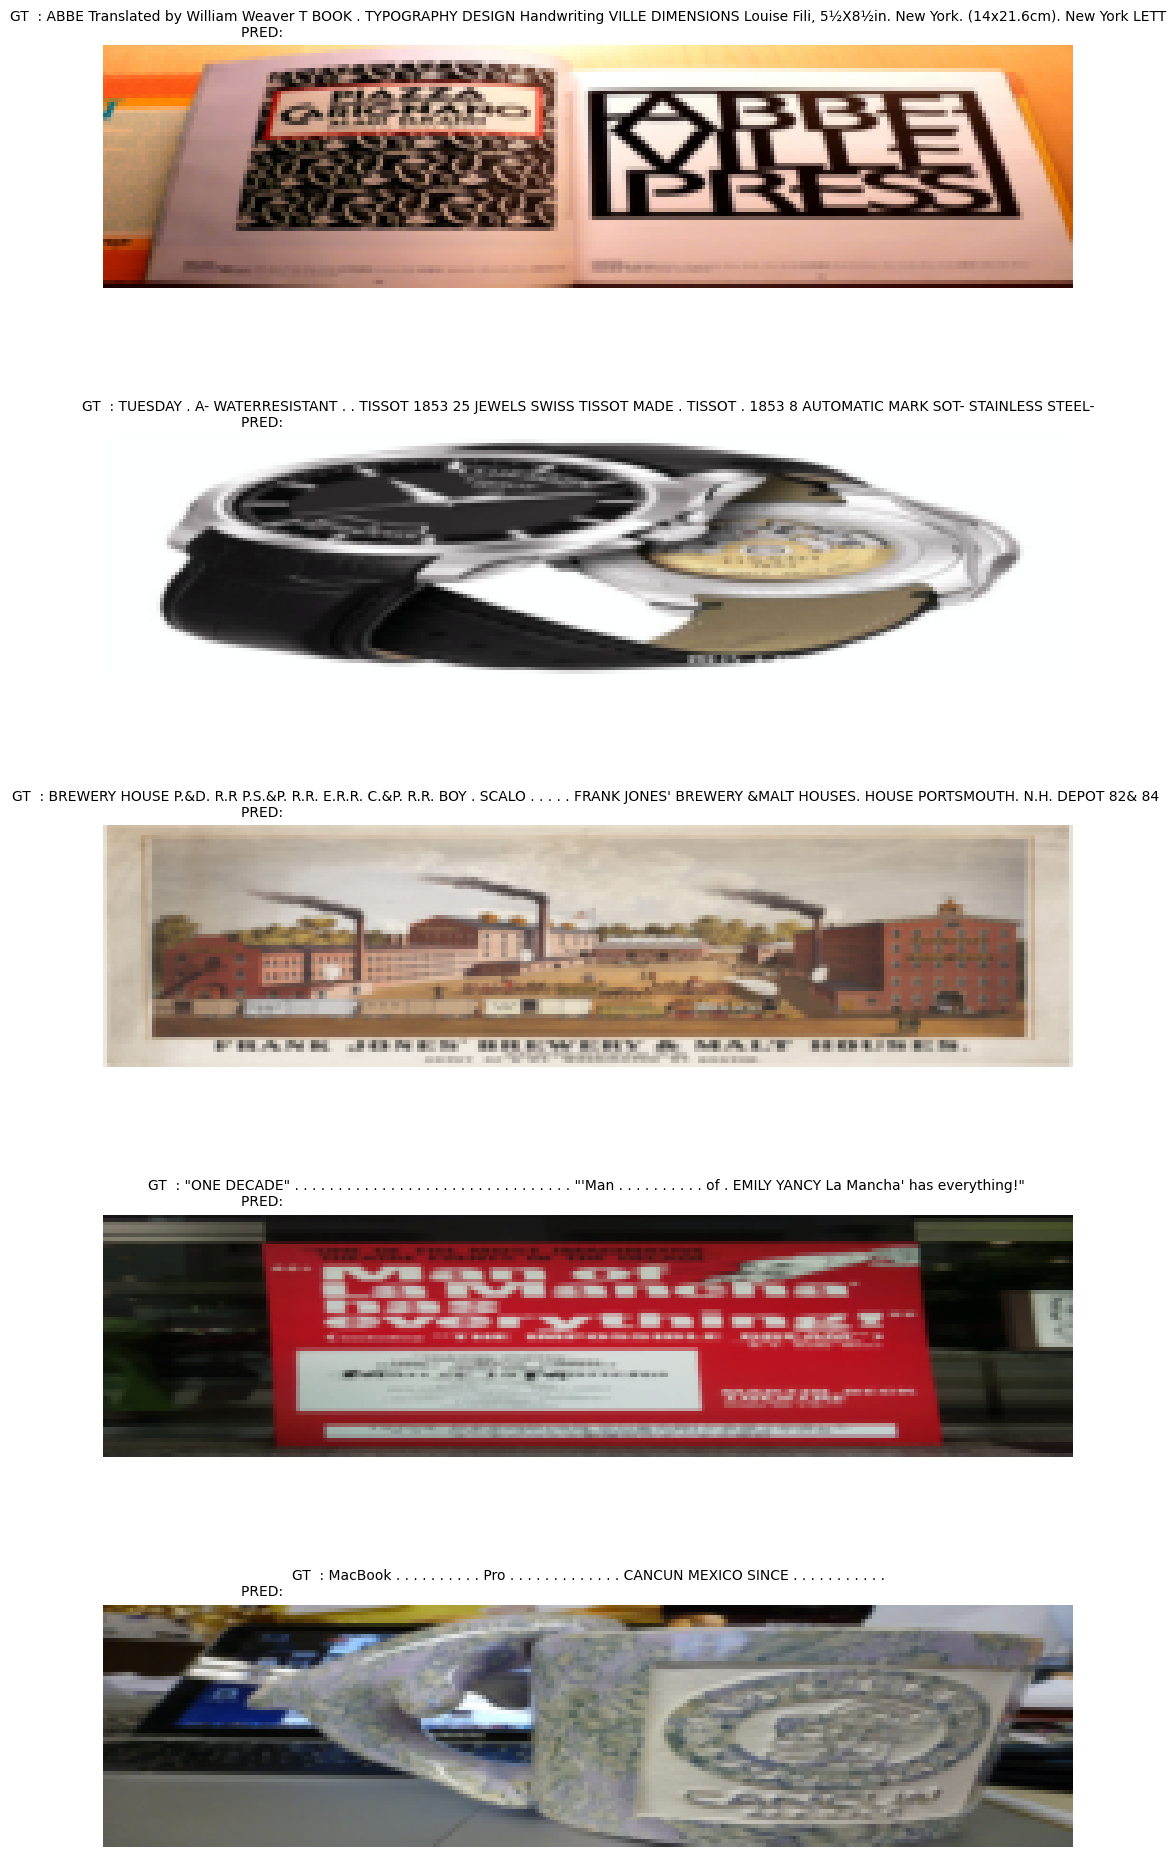

In [14]:
import random
import matplotlib.pyplot as plt

def visualize_prediction(model, dataset, idx2char, device, num_samples=5):
    """ Hiển thị ảnh gốc và text dự đoán """
    model.eval()
    dataset_indices = random.sample(range(len(dataset)), num_samples)

    fig, axes = plt.subplots(num_samples, 1, figsize=(10, num_samples * 4))
    if num_samples == 1:
        axes = [axes] # Đảm bảo axes luôn là list

    for i, data_idx in enumerate(dataset_indices):
        image, target_tensor = dataset[data_idx] # Lấy ảnh đã transform và target tensor

        # Dự đoán
        predicted_text = predict_text(model, image, MAX_SEQ_LEN, SOS_IDX, EOS_IDX, device)

        # Lấy ground truth text
        gt_indices = target_tensor.tolist()
        gt_text = "".join([idx2char[idx] for idx in gt_indices if idx not in (SOS_IDX, EOS_IDX, PAD_IDX)])

        # Chuyển ảnh tensor về dạng hiển thị được (C, H, W) -> (H, W, C) và unnormalize
        img_display = image.permute(1, 2, 0).cpu().numpy()
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img_display = std * img_display + mean
        img_display = np.clip(img_display, 0, 1)

        axes[i].imshow(img_display)
        axes[i].axis('off')
        axes[i].set_title(f"GT  : {gt_text}\nPRED: {predicted_text}", fontsize=10)

    plt.tight_layout()
    plt.show()

# Hiển thị kết quả trên vài mẫu từ tập test
visualize_prediction(model, test_dataset, idx2char, device, num_samples=5)

# --- Vẽ Heatmap Attention (Nâng cao) ---
# Để vẽ heatmap, bạn cần lấy được attention weights từ lớp Cross-Attention cuối cùng trong Decoder.
# Điều này yêu cầu sửa đổi lớp nn.TransformerDecoderLayer hoặc nn.TransformerDecoder
# để nó trả về cả output và attention weights.

# Ví dụ (cần sửa đổi trong forward của nn.TransformerDecoderLayer):
# class CustomTransformerDecoderLayer(nn.TransformerDecoderLayer):
#     def forward(self, tgt, memory, tgt_mask=None, memory_mask=None,
#                 tgt_key_padding_mask=None, memory_key_padding_mask=None):
#         # ... (Phần self-attention) ...
#
#         # Phần cross-attention
#         # Lấy attention weights từ multihead_attn
#         tgt2, attn_weights = self.multihead_attn(tgt + self.dropout2(tgt), memory, memory, attn_mask=memory_mask,
#                                    key_padding_mask=memory_key_padding_mask) # Cần return_attention_weights=True nếu dùng MultiheadAttention trực tiếp
#         # Hoặc lấy từ internal của nn.MultiheadAttention nếu nó được gọi bên trong
#         tgt = tgt + self.dropout2(tgt2)
#         tgt = self.norm2(tgt)
#
#         # ... (Phần feed-forward) ...
#         return tgt, attn_weights # Trả về cả attn_weights


# Sau đó, trong hàm predict_text hoặc một hàm riêng, bạn cần:
# 1. Gọi model và lấy attention weights tại mỗi bước sinh token.
# 2. Xử lý weights (thường là lấy trung bình qua các head).
# 3. Reshape attention weights (vốn tương ứng với chuỗi đặc trưng 1D từ CNN) trở lại kích thước 2D của feature map CNN.
# 4. Upsample heatmap lên kích thước ảnh gốc.
# 5. Vẽ heatmap lên ảnh.

# Việc này khá phức tạp và cần can thiệp sâu vào cấu trúc Transformer của PyTorch.
# Nếu bạn thực sự cần, tôi có thể cung cấp hướng dẫn chi tiết hơn về phần này,
# nhưng nó nằm ngoài phạm vi "triển khai đơn giản".

>> Số lượng ảnh trong JSON: 21778
>> Ví dụ annotation cho ảnh a4ea732cd3d5948a:
 {'id': 'a4ea732cd3d5948a', 'width': 840, 'height': 1024, 'set': 'train', 'file_name': 'train/a4ea732cd3d5948a.jpg'}

>> annot.csv:
   Unnamed: 0                  id          image_id  \
0           0  a4ea732cd3d5948a_1  a4ea732cd3d5948a   
1           1  a4ea732cd3d5948a_2  a4ea732cd3d5948a   
2           2  a4ea732cd3d5948a_3  a4ea732cd3d5948a   
3           3  a4ea732cd3d5948a_4  a4ea732cd3d5948a   
4           4  a4ea732cd3d5948a_5  a4ea732cd3d5948a   

                            bbox  utf8_string  \
0   [525.83, 3.4, 197.64, 33.94]  Performance   
1  [534.67, 64.68, 91.22, 38.19]        Sport   
2  [626.95, 63.62, 96.52, 31.82]        Watch   
3  [577.4, 141.87, 147.13, 43.1]   ...period.   
4  [391.03, 163.9, 60.82, 38.65]            .   

                                              points     area  
0  [525.83, 3.4, 723.47, 7.29, 722.76, 36.99, 525...  6707.90  
1  [535.73, 64.68, 623.41, 67.51, 

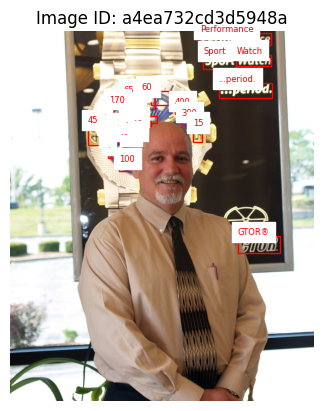

In [15]:
import os
import json
import pandas as pd
import pyarrow.parquet as pq
from PIL import Image
import matplotlib.pyplot as plt

# Đường dẫn dataset
dataset_path = "/kaggle/input/textocr-text-extraction-from-images-dataset"
image_folder = os.path.join(dataset_path, "train_val_images/train_images/")

# ----------- 1. Kiểm tra JSON -----------
json_path = os.path.join(dataset_path, "TextOCR_0.1_train.json")
with open(json_path, "r", encoding="utf-8") as f:
    data_json = json.load(f)

print(">> Số lượng ảnh trong JSON:", len(data_json["imgs"]))
sample_id = list(data_json["imgs"].keys())[0]
sample_ann = data_json["imgs"][sample_id]
print(f">> Ví dụ annotation cho ảnh {sample_id}:\n", sample_ann)

# ----------- 2. Đọc CSV và Parquet -----------
csv_ann = pd.read_csv(os.path.join(dataset_path, "annot.csv"))
csv_img = pd.read_csv(os.path.join(dataset_path, "img.csv"))
parquet_ann = pd.read_parquet(os.path.join(dataset_path, "annot.parquet"))
parquet_img = pd.read_parquet(os.path.join(dataset_path, "img.parquet"))

print("\n>> annot.csv:")
print(csv_ann.head())
print("\n>> img.csv:")
print(csv_img.head())

# ----------- 3. Kiểm tra missing data -----------
def check_missing(df, name):
    print(f"\n> Kiểm tra thiếu dữ liệu trong {name}")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    print(">> Số dòng bị thiếu dữ liệu:", df.isnull().any(axis=1).sum())

check_missing(csv_ann, "annot.csv")
check_missing(csv_img, "img.csv")

# ----------- 4. Xóa dòng thiếu dữ liệu -----------
clean_ann = csv_ann.dropna()
clean_img = csv_img.dropna()
print("\n>> annot.csv sau khi làm sạch:", clean_ann.shape)
print(">> img.csv sau khi làm sạch:", clean_img.shape)

# ----------- 5. Hiển thị ảnh với annotation -----------
def display_image_with_annotation(image_id):
    row = clean_img[clean_img['id'] == image_id]
    if row.empty:
        print(f"Không tìm thấy ảnh với id {image_id}")
        return
    img_file = row['file_name'].values[0].replace("train/", "")
    img_path = os.path.join(image_folder, img_file)

    if not os.path.exists(img_path):
        print(f"Ảnh {img_path} không tồn tại.")
        return

    image = Image.open(img_path).convert("RGB")
    anns = clean_ann[clean_ann["image_id"] == image_id]

    plt.imshow(image)
    plt.axis("off")
    for i, row in anns.iterrows():
        text = row['utf8_string']
        bbox = eval(row['bbox']) if isinstance(row['bbox'], str) else row['bbox']
        x, y, w, h = bbox
        plt.gca().add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=1))
        plt.text(x, y-5, text, fontsize=6, color='red', backgroundcolor='white')
    plt.title(f"Image ID: {image_id}")
    plt.show()

# ----------- 6. Hiển thị ảnh mẫu -----------
sample_image_id = clean_img['id'].iloc[0]
display_image_with_annotation(sample_image_id)